Проект по А/B-тестированию



Описание данных
*ab_project_marketing_events.csv* — календарь маркетинговых событий на 2020 год.
Структура файла:
name — название маркетингового события;
regions — регионы, в которых будет проводиться рекламная кампания;
start_dt — дата начала кампании;
finish_dt — дата завершения кампании.



*final_ab_new_users.csv* — пользователи, зарегистрировавшиеся с 7 по 21 декабря 2020 года.
Структура файла:
user_id — идентификатор пользователя;
first_date — дата регистрации;
region — регион пользователя;
device — устройство, с которого происходила регистрация.


*final_ab_events.csv* — действия новых пользователей в период с 7 декабря 2020 по 4 января 2021 года.
Структура файла:
user_id — идентификатор пользователя;
event_dt — дата и время покупки;
event_name — тип события;
details — дополнительные данные о событии. Например, для покупок, purchase, в этом поле хранится стоимость покупки в долларах.



*final_ab_participants.csv* — таблица участников тестов.
Структура файла:
user_id — идентификатор пользователя;
ab_test — название теста;
group — группа пользователя.



Постановка задачи
*Задача — провести оценку результатов A/B-теста.* В распоряжении есть датасет с действиями пользователей, техническое задание и несколько вспомогательных датасетов.



*Оценить корректность проведения теста*

пересечение тестовой аудитории с конкурирующим тестом,
совпадение теста и маркетинговых событий, другие проблемы временных границ теста.
*Проанализировать результаты теста*



Техническое задание
Название теста: *recommender_system_test*;
группы: А — контрольная, B — новая платёжная воронка;
дата запуска: 2020-12-07;
дата остановки набора новых пользователей: 2020-12-21;
дата остановки: 2021-01-04;
аудитория: 15% новых пользователей из региона EU;
назначение теста: *тестирование изменений, связанных с внедрением улучшенной рекомендательной системы*;
ожидаемое количество участников теста: 6000.
ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:
конверсии в просмотр карточек товаров — событие product_page,
просмотры корзины — product_cart,
покупки — purchase.
План работы
*Загрузка данных и подготовка их к анализу*



*Предобработка данных*



Преобразование данных к нужным типам
*Оценка корректности проведения теста*
Соответствие данных требованиям технического задания
Время проведения теста
Аудитория теста
*Исследовательский анализ данных*
Распределение событий на одного пользователя в выборках
Распределение событий и пользователей по дням
Изменение конверсии в воронке на разных этапах
*A/B - тестирование*
Изменение метрик за 14 дней с момента регистрации пользователя
Проверка статистической разницы долей z-критерием
*Вывод*

Задачу взял тут: https://github.com/MikhailAleshin/Data-Analysis-Projects/tree/main/A_B_test

In [1]:
import pandas as pd
import numpy as np 
from scipy import stats 
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ab_project_marketing_events = pd.read_csv("/content/drive/MyDrive/ab_project_marketing_events.csv",error_bad_lines=False, engine="python")

<ipython-input-3-4fe7b28176d6>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ab_project_marketing_events = pd.read_csv("/content/drive/MyDrive/ab_project_marketing_events.csv",error_bad_lines=False, engine="python")


In [4]:
final_ab_new_users = pd.read_csv("/content/drive/MyDrive/final_ab_new_users.csv",error_bad_lines=False, engine="python")

<ipython-input-4-494b3f897e40>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  final_ab_new_users = pd.read_csv("/content/drive/MyDrive/final_ab_new_users.csv",error_bad_lines=False, engine="python")


In [5]:
final_ab_events = pd.read_csv("/content/drive/MyDrive/final_ab_events.csv",error_bad_lines=False, engine="python")

<ipython-input-5-ded0bf01929b>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  final_ab_events = pd.read_csv("/content/drive/MyDrive/final_ab_events.csv",error_bad_lines=False, engine="python")


In [6]:
final_ab_participants = pd.read_csv("/content/drive/MyDrive/final_ab_participants.csv",error_bad_lines=False, engine="python")

<ipython-input-6-018f7bdc3d96>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  final_ab_participants = pd.read_csv("/content/drive/MyDrive/final_ab_participants.csv",error_bad_lines=False, engine="python")


##календарь маркетинговых событий на 2020 год

In [7]:
ab_project_marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [8]:
ab_project_marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [9]:
ab_project_marketing_events['start_dt'] = pd.to_datetime(ab_project_marketing_events['start_dt'], format="%Y-%m-%d") # преобразовываем формат даты

In [10]:
ab_project_marketing_events['finish_dt'] = pd.to_datetime(ab_project_marketing_events['finish_dt'], format="%Y-%m-%d") # преобразовываем формат даты

In [11]:
num_duplicates1= ab_project_marketing_events.duplicated().sum() # проверяем на дубликаты
num_duplicates1

0

In [12]:
print(ab_project_marketing_events.isna().sum()) # проверка на пропуски

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64


С таблицей маркетинговых событий проблем нет.данные преобразовал

##Пользователи, зарегистрировавшиеся с 7 по 21 декабря 2020 года

In [13]:
final_ab_new_users

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
61728,1DB53B933257165D,2020-12-20,EU,Android
61729,538643EB4527ED03,2020-12-20,EU,Mac
61730,7ADEE837D5D8CBBD,2020-12-20,EU,PC
61731,1C7D23927835213F,2020-12-20,EU,iPhone


In [14]:
final_ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


In [15]:
final_ab_new_users['first_date'].min()

'2020-12-07'

In [16]:
final_ab_new_users['first_date'].max()

'2020-12-23'

In [17]:
final_ab_new_users[final_ab_new_users['first_date'] > '2020-12-21']['user_id'].nunique() # количество набранных пользователей после 21.12

5263

In [110]:
#final_ab_new_users= final_ab_new_users[final_ab_new_users['first_date'] <= '2020-12-21']

In [18]:
final_ab_new_users['first_date'] = pd.to_datetime(final_ab_new_users['first_date'], format="%Y-%m-%d") # преобразовываем формат даты

In [19]:
num_duplicates2 = final_ab_new_users.duplicated().sum() # проверяем на дубликаты
num_duplicates2

0

In [20]:
print(final_ab_new_users.isna().sum()) # проверка на пропуски

user_id       0
first_date    0
region        0
device        0
dtype: int64


Формат дат преобразовал.В таблице 5263 пользователя,которых набрали после 21.12.20(8,5%)




##действия новых пользователей в период с 7 декабря 2020 по 4 января 2021 года

In [21]:
final_ab_events

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
440312,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
440313,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
440314,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
440315,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [22]:
final_ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


In [23]:
final_ab_events['event_dt'].min()

'2020-12-07 00:00:33'

In [24]:
final_ab_events['event_dt'].max()

'2020-12-30 23:36:33'

In [25]:
final_ab_events['event_dt'] = pd.to_datetime(final_ab_events['event_dt'], format="%Y-%m-%d")
final_ab_events['event_dt'] = final_ab_events['event_dt'].dt.date

In [26]:
final_ab_events['details'] = final_ab_events['details'].astype(float)

In [27]:
num_duplicates3 = final_ab_events.duplicated().sum() # проверяем на дубликаты
num_duplicates3

2

In [28]:
final_ab_events.drop_duplicates (inplace=True) #дропаем дубликаты

In [29]:
print(final_ab_events.isna().sum()) # проверка на пропуски

user_id            0
event_dt           0
event_name         0
details       377576
dtype: int64


#Формат даты преобразовал.Но данные неполные:информация об активности только до 30.12.20+ с 25.12 активности пользователей наложились на рождественнские праздники

##таблица участников тестов

In [30]:
final_ab_participants

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
...,...,...,...
18263,1D302F8688B91781,B,interface_eu_test
18264,3DE51B726983B657,A,interface_eu_test
18265,F501F79D332BE86C,A,interface_eu_test
18266,63FBE257B05F2245,A,interface_eu_test


In [31]:
final_ab_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


In [32]:
num_duplicates4 = final_ab_participants.duplicated().sum() # проверяем на дубликаты
num_duplicates4

0

In [33]:
print(final_ab_participants.isna().sum()) # проверка на пропуски

user_id    0
group      0
ab_test    0
dtype: int64


##2.Проверка на пересечения между АБ тестами и Оценка корректности проведения теста

In [34]:
import statsmodels.stats.power as smp # проверяем неоходимое количество пользователей
effect_size = 0.1
alpha = 0.05
power = 0.8
sample_size = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power)
print("Размер выборки для достижения мощности {0}: {1}".format(power, round(sample_size)));

Размер выборки для достижения мощности 0.8: 1571


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


In [40]:
count_A=final_ab_participants[(final_ab_participants['group']=='A')& (final_ab_participants['ab_test']=='recommender_system_test')]['user_id'].nunique() # размер контрольной группы
count_A

2903

In [41]:
count_B=final_ab_participants[(final_ab_participants['group']=='B')& (final_ab_participants['ab_test']=='recommender_system_test')]['user_id'].nunique() # размер тестовой группы
count_B

2196

Пользователей достаточно

In [37]:
test1_users = final_ab_participants[final_ab_participants['ab_test'] == 'interface_eu_test']['user_id'].unique() # проверяем на пересечение между аб тестами
test2_users = final_ab_participants[final_ab_participants['ab_test'] == 'recommender_system_test']['user_id'].unique()
users_in_both_tests = np.intersect1d(test1_users, test2_users)

In [38]:
users_in_both_tests_count = np.intersect1d(test1_users, test2_users).size # количество пересечений между аб тестами
users_in_both_tests_count

1602

In [39]:
final_ab_participants = final_ab_participants[~final_ab_participants['user_id'].isin(users_in_both_tests)] #удаляем.выборки достаточно


3.Проверка на пересечения между группами

In [42]:
test3_users = final_ab_participants[(final_ab_participants['group'] == 'A')&(final_ab_participants['ab_test'] == 'recommender_system_test')]['user_id'].unique() # проверяем на пересечение между группами
test4_users = final_ab_participants[(final_ab_participants['group'] == 'B')&(final_ab_participants['ab_test'] == 'recommender_system_test')]['user_id'].unique()
users_in_both_tests1 = np.intersect1d(test3_users, test4_users)


In [43]:
users_in_both_tests1_count = np.intersect1d(test3_users, test4_users).size # количество пересечений между группами
users_in_both_tests1_count

0

Есть проблема пересечения АБ тестов.пересечения удалил

In [48]:
final_ab_participants=final_ab_participants[final_ab_participants['ab_test'] == 'recommender_system_test'] # сбрасываем интерфейсный аб тест

In [73]:
df = final_ab_participants.merge(final_ab_events,how='left', on='user_id') # для удобства работы объединяем все в одну таблицу

In [78]:
df = df.merge(final_ab_new_users, on='user_id')

In [83]:
df

,user_id,group,ab_test,event_dt,event_name,details,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,purchase,99.99,2020-12-07,EU,PC
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-25,purchase,4.99,2020-12-07,EU,PC
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,product_cart,NaN,2020-12-07,EU,PC
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-25,product_cart,NaN,2020-12-07,EU,PC
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,product_page,NaN,2020-12-07,EU,PC
...,...,...,...,...,...,...,...,...,...
21110,6715343AFBA285AE,B,recommender_system_test,2020-12-07,login,NaN,2020-12-07,CIS,Android
21111,6715343AFBA285AE,B,recommender_system_test,2020-12-08,login,NaN,2020-12-07,CIS,Android
21112,6715343AFBA285AE,B,recommender_system_test,2020-12-09,login,NaN,2020-12-07,CIS,Android
21113,6715343AFBA285AE,B,recommender_system_test,2020-12-10,login,NaN,2020-12-07,CIS,Android


In [80]:
df[df['ab_test']=='recommender_system_test'].nunique() # всего участвует пользователей

user_id       5099
group            2
ab_test          1
event_dt        24
event_name       4
details          4
first_date      15
region           4
device           4
dtype: int64

In [84]:
count_A=df[(df['group']=='A')& (df['ab_test']=='recommender_system_test')]['user_id'].nunique() # размер контрольной группы
count_A

2903

In [85]:
count_B=df[(df['group']=='B')& (df['ab_test']=='recommender_system_test')]['user_id'].nunique() # размер тестовой группы
count_B

2196

##Распределение событий на одного пользователя в выборках

##Распределение пользователей по дням

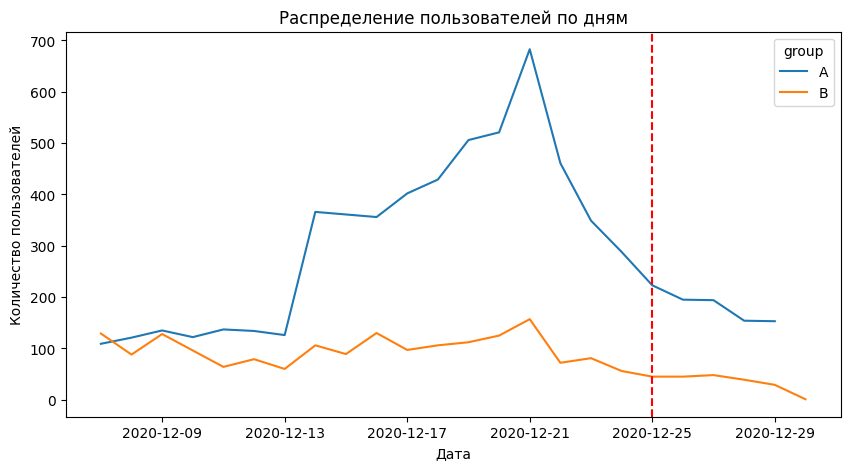

In [97]:
df_test1 = df[df['ab_test'] == 'recommender_system_test']
pivot_table = df_test1.pivot_table(index='event_dt', columns='group', values='user_id', aggfunc='nunique')
ax = pivot_table.plot(kind='line', figsize=(10,5), title='Распределение пользователей по дням')
ax.axvline('2020-12-25', color='red', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.show()

##Распределение событий по дням

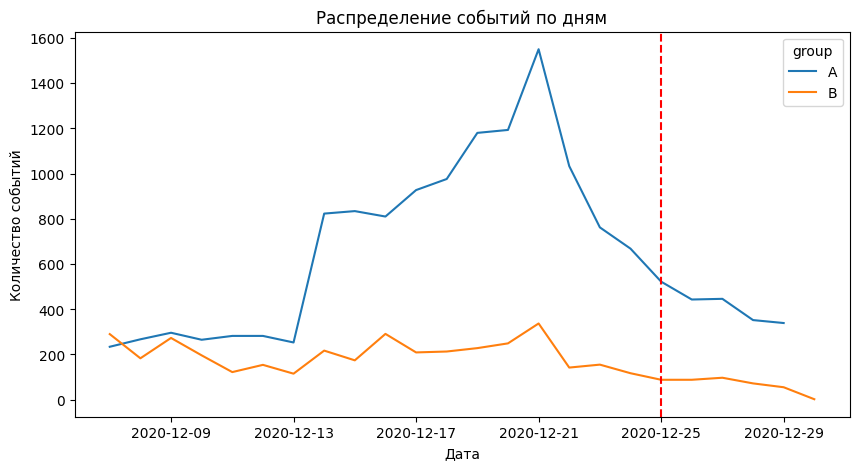

In [98]:
df_test1 = df[df['ab_test'] == 'recommender_system_test']
pivot_table = df_test1.pivot_table(index='event_dt', columns='group', values='event_name', aggfunc='count')
ax = pivot_table.plot(kind='line', figsize=(10,5), title='Распределение событий по дням')
ax.axvline('2020-12-25', color='red', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.show()

In [100]:
df_test3= df[df['ab_test'] == 'recommender_system_test'].groupby(['event_dt','group']).agg({'event_name':'count',
                                     'user_id':'nunique'}).reset_index()
df_test3['mean_event']=df_test3['event_name']/df_test3['user_id']
df_test3.head()

,event_dt,group,event_name,user_id,mean_event
0,2020-12-07,A,234,109,2.146789
1,2020-12-07,B,290,129,2.248062
2,2020-12-08,A,267,121,2.206612
3,2020-12-08,B,183,88,2.079545
4,2020-12-09,A,296,135,2.192593


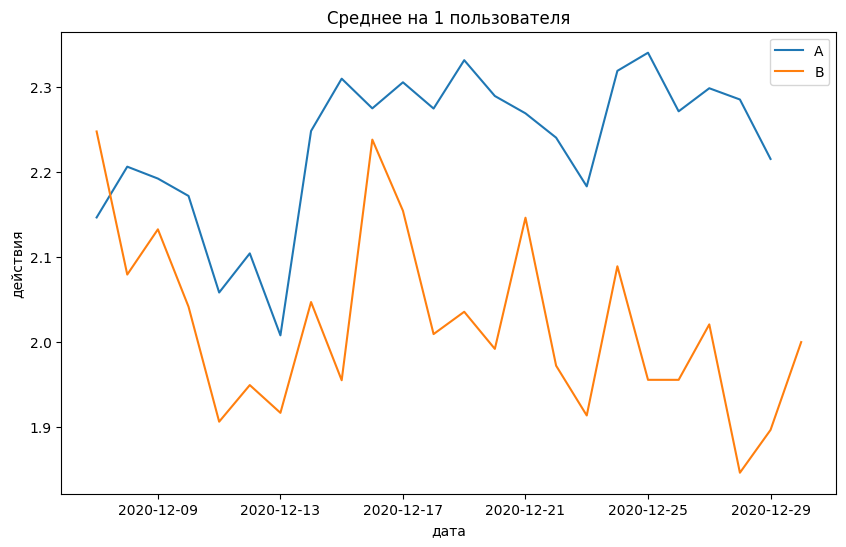

In [89]:
df_group_a = df_test3.loc[df_test3['group'] == 'A']
df_group_b = df_test3.loc[df_test3['group'] == 'B']
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df_group_a['event_dt'], df_group_a['mean_event'], label='A')
ax.plot(df_group_b['event_dt'], df_group_b['mean_event'], label='B')
ax.set_title('Среднее на 1 пользователя')
ax.set_xlabel('дата')
ax.set_ylabel('действия')
ax.legend()
plt.show()

Количество событий по дням кореллирует с количеством пользователей.с 13 декабря наблюдается резкий приток пользователей контрольной группы и так до 21.12.при этом количество пользователей тестовой группы изменилось незначительно.что то пошло не так,надо разбираться

## Считаем конверсию по группам

In [93]:
df1=df[(df['group']=='A')]

In [94]:
df2=df[(df['group']=='B')]

In [138]:
total_participants=df1['user_id'].nunique()
logins=df1[(df1['event_name'] == 'login')]['user_id'].nunique()
pages = df1[(df1['event_name'] == 'product_page')]['user_id'].nunique()
carts = df1[(df1['event_name'] == 'product_cart')]['user_id'].nunique()
purchases = df1[(df1['event_name'] == 'purchase')]['user_id'].nunique()
payments = df1['details'].mean().round()

participants=1
login_enter= logins/total_participants
product_pages_A= pages/logins
conv_carts_A = carts / pages
conv_purchases_A = purchases / carts

print(total_participants, f'Всего участников группы A: {participants:}')
print(logins, f'Конверсия группы A на страницу логина: {login_enter:}')
print(pages, f'Конверсия группы Aна страницу товара: {product_pages_A:}')
print(carts,f'Конверсия группы A на страницу корзины: {conv_carts_A:}')
print(purchases,f'Конверсия группы A на страницу покупки: {conv_purchases_A:}')

2903 Всего участников группы A: 1
2082 Конверсия группы A на страницу логина: 0.7171891147089218
1360 Конверсия группы Aна страницу товара: 0.6532180595581172
631 Конверсия группы A на страницу корзины: 0.46397058823529413
652 Конверсия группы A на страницу покупки: 1.0332805071315372


In [139]:
total_participants2=df2['user_id'].nunique()
logins2=df2[(df2['event_name'] == 'login')]['user_id'].nunique()
pages2 = df2[(df2['event_name'] == 'product_page')]['user_id'].nunique()
carts2 = df2[(df2['event_name'] == 'product_cart')]['user_id'].nunique()
purchases2 = df2[(df2['event_name'] == 'purchase')]['user_id'].nunique()
payments2 = df2['details'].mean().round()

participants2=1
login_enter2= logins2/total_participants2
product_pages_B= pages2/logins2
conv_carts_B = carts2 / pages2
conv_purchases_B = purchases2 / carts2

print(total_participants2, f'Всего участников группы B: {participants2:}')
print(logins2, f'Конверсия группы B на страницу логина: {login_enter2:}')
print(pages2, f'Конверсия группы B на страницу товара: {product_pages_B:}')
print(carts2,f'Конверсия группы B на страницу корзины: {conv_carts_B:}')
print(purchases2,f'Конверсия группы B на страницу покупки: {conv_purchases_B:}')

2196 Всего участников группы B: 1
706 Конверсия группы B на страницу логина: 0.3214936247723133
397 Конверсия группы B на страницу товара: 0.5623229461756374
195 Конверсия группы B на страницу корзины: 0.491183879093199
198 Конверсия группы B на страницу покупки: 1.0153846153846153


В тестовой группе уже на этапе логина отвалилось 68% участников.На страницу товара лучше переходят в контрольной группе,что уже говорит о несовершенстве новой рекомендательной системы.Ну а кто до корзины дошел,без покупки не уходит)

##Z-тест 

In [104]:
# анализ конверсии переход на страницу логина
n_a = total_participants
n_b = total_participants2

conv_a = login_enter
conv_b = login_enter2

p_pool = (conv_a * n_a + conv_b * n_b) / (n_a + n_b)

se = math.sqrt(p_pool * (1 - p_pool) * (1 / n_a + 1 / n_b))

z_score = (conv_b - conv_a) / se

z_critical = 1.96

print(f"Z-score: {z_score:.3f}")
if abs(z_score) > z_critical:
    print("Отвергаем нулевую гипотезу, различия между группами статистически значимы")
else:
    print("Не получилось отвергнуть нулевую гипотезу, различия между группами не являются статистически значимыми")

Z-score: -28.106
Отвергаем нулевую гипотезу, различия между группами статистически значимы


In [105]:
# анализ конверсии переход на страницу товара
n_a = total_participants
n_b = total_participants2

conv_a = product_pages_A
conv_b = product_pages_B

p_pool = (conv_a * n_a + conv_b * n_b) / (n_a + n_b)

se = math.sqrt(p_pool * (1 - p_pool) * (1 / n_a + 1 / n_b))

z_score = (conv_b - conv_a) / se

z_critical = 1.96

print(f"Z-score: {z_score:.3f}")
if abs(z_score) > z_critical:
    print("Отвергаем нулевую гипотезу, различия между группами статистически значимы")
else:
    print("Не получилось отвергнуть нулевую гипотезу, различия между группами не являются статистически значимыми")


Z-score: -6.602
Отвергаем нулевую гипотезу, различия между группами статистически значимы


In [106]:
# анализ конверсии переход на страницу корзины
n_a = total_participants
n_b = total_participants2

conv_a = conv_carts_A
conv_b = conv_carts_B

p_pool = (conv_a * n_a + conv_b * n_b) / (n_a + n_b)

se = math.sqrt(p_pool * (1 - p_pool) * (1 / n_a + 1 / n_b))

z_score = (conv_b - conv_a) / se

z_critical = 1.96

print(f"Z-score: {z_score:.3f}")
if abs(z_score) > z_critical:
    print("Отвергаем нулевую гипотезу, различия между группами статистически значимы")
else:
    print("Не получилось отвергнуть нулевую гипотезу, различия между группами не являются статистически значимыми")


Z-score: 1.927
Не получилось отвергнуть нулевую гипотезу, различия между группами не являются статистически значимыми


выводы в конце

##Давайте посчитаем деньги

In [134]:
df[(df['details']>0)&(df['group']=='A')]['details'].agg(['count', 'sum', 'mean']) # смотрим количество оплат,общую сумму и среднее в группе А

count     1973.000000
sum      45655.270000
mean        23.140025
Name: details, dtype: float64

In [135]:
df[(df['details']>0)&(df['group']=='A')]['details'].agg(['count'])/total_participants # доля оплативших в группе А

count    0.386939
Name: details, dtype: float64

In [129]:
df[(df['details']>0)&(df['group']=='B')]['details'].agg(['count', 'sum', 'mean']) # смотрим количество оплат,общую сумму и среднее в группе В

count      510.000000
sum      11204.900000
mean        21.970392
Name: details, dtype: float64

In [133]:
df[(df['details']>0)&(df['group']=='B')]['details'].agg(['count'])/total_participants2 # доля оплативших в группе В

count    0.23224
Name: details, dtype: float64

Тут и по деньгам тоже ожидаемо лучше в контрольной группе:средний чек и доля платящих

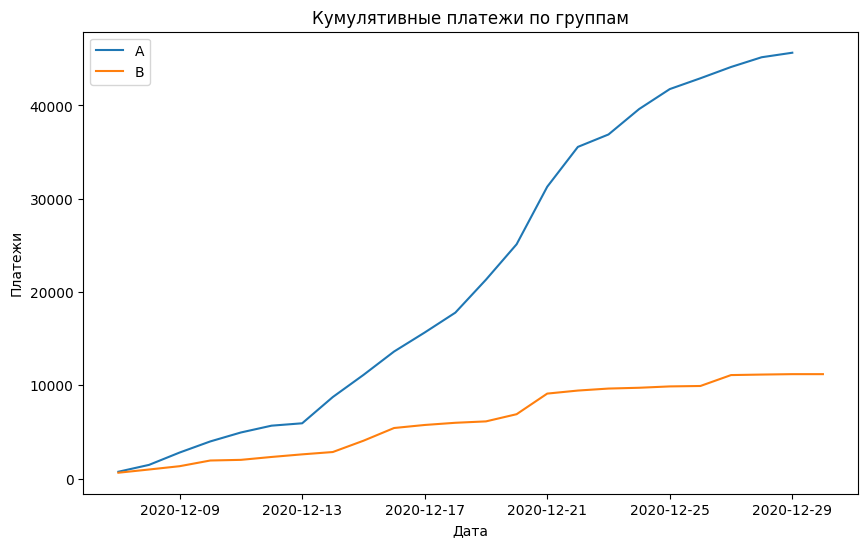

In [110]:
df = df.sort_values(by='event_dt')
cumulative_data = df.groupby(['group', 'event_dt'])['details'].sum().groupby('group').cumsum().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

for group, data in cumulative_data.groupby('group'):
    ax.plot(data['event_dt'], data['details'], label=group)

ax.set_title('Кумулятивные платежи по группам')
ax.set_xlabel('Дата')
ax.set_ylabel('Платежи')
ax.legend()

plt.show()

##Выводы


Тест был проведен с нарушениями: он пересекался с другим тестом, проводился в праздничные и предпраздничные дни, разница между контрольной и тестовой группами составила 24% пользователей, пользователей начали набирать после 21.12, что нарушает ТЗ, и нет информации после 30.12.

Необходимо выяснить, куда пропали почти 70% пользователей, которые не прошли стадию логина.

Конверсия перехода на страницу товара в контрольной группе лучше, чем в тестовой, на 9 процентных пунктов.

Конверсия, касающаяся оплат, осталась почти без изменений. Это относится к тем, кто дошел до корзины. Доля пользователей, дошедших до оплаты, в контрольной группе лучше на 15 процентных пунктов!!! И средний чек в тестовой группе хуже.

Нельзя принимать решения, опираясь на результаты этого теста.